### 1) Importing required libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [2]:
import itertools

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Customer segmentation.csv')

In [5]:
data.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


### 2) Simple visualization

In [6]:
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True).head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
23632,7807,23632,11,-65.15,1,10,0.00,0.0,86.97,13.03,0.0,0.0,0.00,0.0
4554,1487,4554,9,-63.64,7,13,0.00,0.0,100.00,0.00,0.0,0.0,0.00,0.0
7185,2418,7185,9,-47.26,5,8,0.00,0.0,100.00,0.00,0.0,0.0,0.00,0.0
768,199,768,14,-39.84,6,8,28.97,0.0,71.03,0.00,0.0,0.0,0.00,0.0
16098,5379,16098,8,-26.15,3,13,0.00,0.0,100.00,0.00,0.0,0.0,0.00,0.0
23633,7807,23633,22,-23.98,3,19,7.74,0.0,39.63,52.63,0.0,0.0,0.00,0.0
22311,7423,22311,12,-23.89,2,11,15.93,0.0,28.08,0.00,0.0,0.0,55.98,0.0
7183,2418,7183,9,-20.59,3,13,0.00,0.0,100.00,0.00,0.0,0.0,0.00,0.0
7181,2418,7181,9,-20.59,2,20,0.00,0.0,100.00,0.00,0.0,0.0,0.00,0.0
7182,2418,7182,9,-20.59,2,8,0.00,0.0,100.00,0.00,0.0,0.0,0.00,0.0


-> drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks.

#### Selecting samples

In [8]:
indices = [56,2459,908,23632,1803,218,592,349]
data.iloc[indices, :]

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
56,4,56,32,3.10,3,19,36.49,53.59,9.92,0.00,0.00,0.00,0.00,0.00
2459,744,2459,57,14.01,2,22,24.86,7.26,21.37,19.64,1.64,0.72,24.51,0.00
908,238,908,23,2.98,3,21,8.20,19.14,32.27,4.97,4.02,1.89,29.51,0.00
23632,7807,23632,11,-65.15,1,10,0.00,0.00,86.97,13.03,0.00,0.00,0.00,0.00
1803,529,1803,9,5.77,4,7,0.00,0.00,0.00,25.56,0.00,0.00,0.00,74.44
218,43,218,21,9.87,3,16,0.00,0.00,23.69,76.31,0.00,0.00,0.00,0.00
592,145,592,15,4.51,5,19,7.48,0.00,0.00,16.22,60.29,0.00,0.00,16.00
349,70,349,17,27.05,1,15,19.01,0.00,0.00,0.00,0.00,0.00,80.99,0.00


In [9]:
df = data.drop(['customer', 'order', 'hour'], axis=1)
frame = data

### 3) Visualization via pca and pairplot

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(n_components=11)

This function accepts pca object and data frame as arguements and plots the scatter plot of first four principal components.

In [12]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(5,5))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=6, fit_reg=False, scatter_kws={'s':4});
    sns.lmplot(x='dim3', y='dim4', data=data, size=6, fit_reg=False, scatter_kws={'s':4});
    plt.show()

<Figure size 360x360 with 0 Axes>

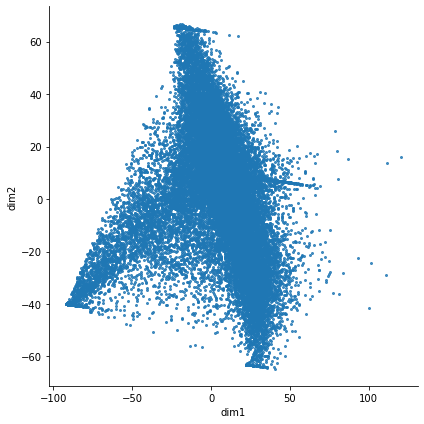

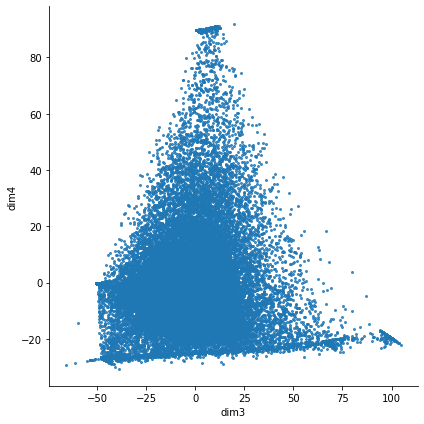

In [13]:
pca_2d_plot(pca, df)

Now let's plot the pairplots and see the variations and distributions of features with respect to each other.

<Figure size 720x720 with 0 Axes>

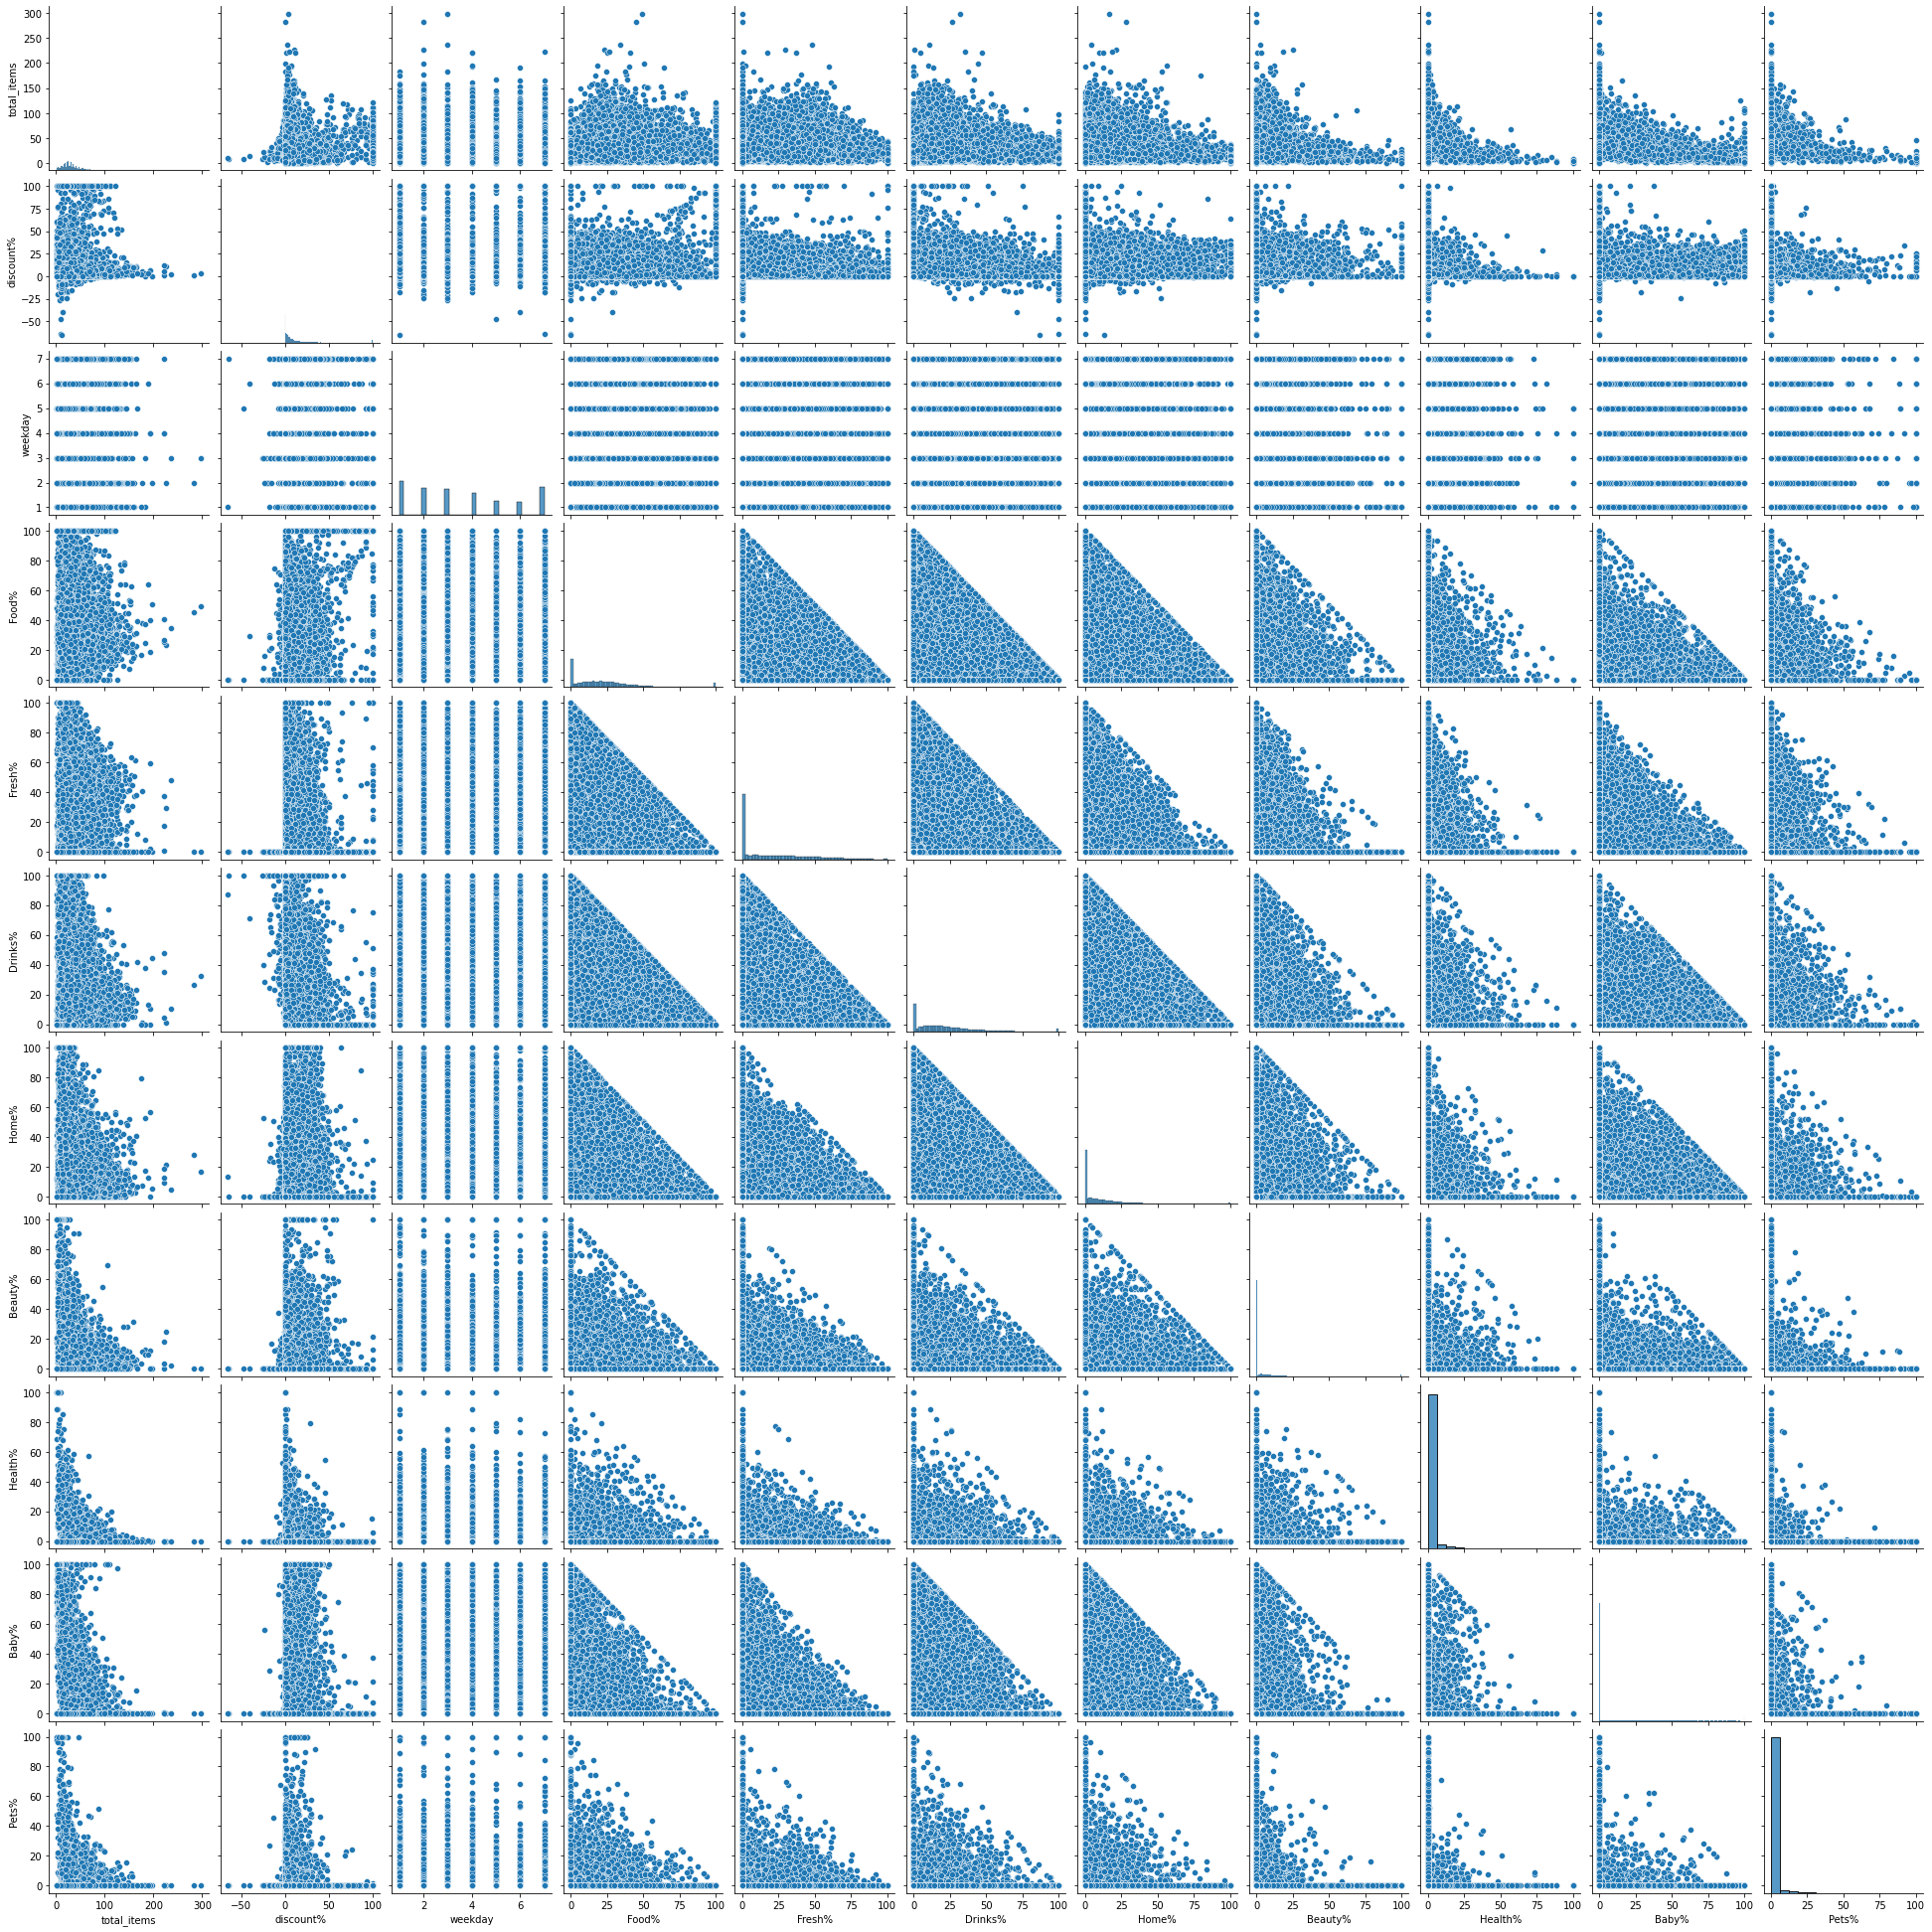

In [14]:
figure = plt.figure(figsize=(10,10))
sns.pairplot(df);
plt.show()

### 5) Outlier detection

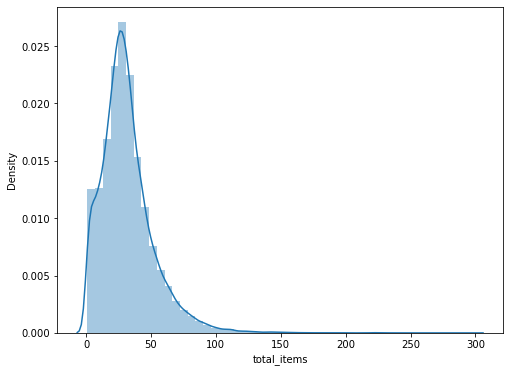

In [15]:
fig = plt.figure(figsize=(8,6))
sns.distplot(df['total_items']);
plt.show()

This distribution is skewed negatively, let's apply a log transformation.

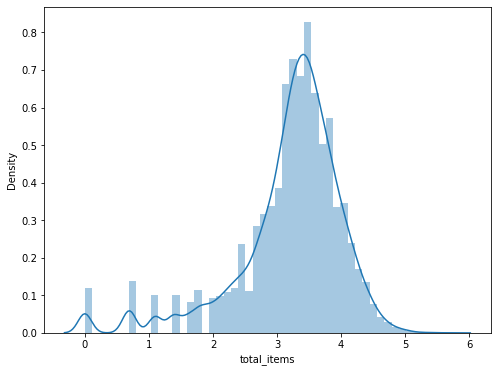

In [16]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(8,6))
sns.distplot(df['total_items']);
plt.show()

That's better

#### Turkey Outlier Detection

In [17]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [18]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->1899
_________________________
discount%-------->2337
_________________________
weekday-------->0
_________________________
Food%-------->1221
_________________________
Fresh%-------->254
_________________________
Drinks%-------->1386
_________________________
Home%-------->1432
_________________________
Beauty%-------->2901
_________________________
Health%-------->30000
_________________________
Baby%-------->6403
_________________________
Pets%-------->30000


In [19]:
df.drop(outlier_indices['total_items'], inplace=True)

In [20]:
frame.drop(outlier_indices['total_items'], inplace=True)

## 6) Are there clusters in the data, how many clusters?

#### Elbow Method

In [21]:
from sklearn.cluster import KMeans

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(df.values)

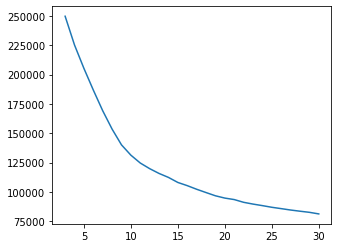

In [24]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(clusters, inertia);
plt.show()

#### Silhoutte Score

In [25]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(num_clusters, sil_score)
    plt.show()

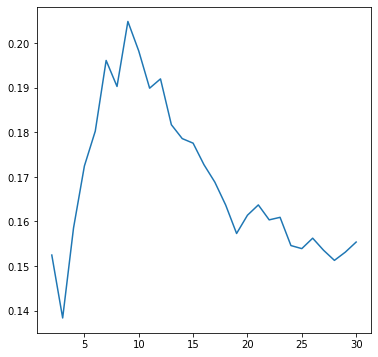

In [26]:
plot_silhoutte_score(X,30)

### 7) Clustering and interpretation

In [35]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [36]:
frame[frame['labels']==0].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
11,1,11,7,15.00,1,8,0.00,39.93,60.07,0.00,0.00,0.0,0.00,0.0,0
96,8,96,32,24.44,4,22,7.18,33.83,53.07,5.92,0.00,0.0,0.00,0.0,0
140,18,140,16,21.57,4,13,1.69,36.07,62.24,0.00,0.00,0.0,0.00,0.0,0
164,27,164,15,8.69,7,11,31.68,0.00,61.41,2.76,4.15,0.0,0.00,0.0,0
165,27,165,23,0.00,7,12,25.35,6.84,61.86,5.95,0.00,0.0,0.00,0.0,0
184,33,184,28,4.09,3,15,15.20,19.15,40.01,9.16,12.07,0.0,4.41,0.0,0
195,38,195,22,0.00,4,12,21.81,6.09,63.07,0.00,9.03,0.0,0.00,0.0,0
196,38,196,24,1.01,4,11,23.40,7.24,46.79,22.56,0.00,0.0,0.00,0.0,0
197,38,197,25,0.00,3,13,7.41,14.49,60.29,17.82,0.00,0.0,0.00,0.0,0
220,45,220,20,3.66,1,14,0.00,3.89,68.21,6.99,20.90,0.0,0.00,0.0,0


In [37]:
frame[frame['labels']==0].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.0
mean,4989.490086,14941.972477,23.474697,5.624948,3.400710,14.639834,12.269216,5.812510,69.085587,7.931347,2.107369,0.219325,2.075629,0.317887,0.0
std,2920.171772,8750.669838,11.721262,7.965894,1.879546,5.462198,11.791241,9.799673,17.992364,10.041479,4.794695,1.407846,6.935114,2.113976,0.0
min,1.000000,11.000000,6.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,19.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2326.000000,6842.000000,15.000000,0.655000,2.000000,11.000000,0.000000,0.000000,54.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5017.000000,14946.000000,22.000000,3.500000,3.000000,15.000000,10.300000,0.000000,65.100000,3.280000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7560.000000,22767.500000,30.000000,7.750000,5.000000,19.000000,20.090000,9.170000,82.320000,14.035000,0.000000,0.000000,0.000000,0.000000,0.0
max,10237.000000,29998.000000,98.000000,66.140000,7.000000,23.000000,59.130000,55.780000,100.000000,43.230000,29.400000,16.720000,45.820000,24.660000,0.0


In [38]:
frame.loc[frame['labels']==0, 'class'] = 'drink_buyers'

In [39]:
frame[frame['labels']==1].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.0,0.0,0.0,1,NaN
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.0,0.0,0.0,1,NaN
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.0,0.0,0.0,1,NaN
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.0,0.0,0.0,1,NaN
5,1,5,8,23.89,4,13,0.00,100.00,0.00,0.00,0.00,0.0,0.0,0.0,1,NaN
6,1,6,35,17.26,1,10,13.01,51.84,29.36,5.79,0.00,0.0,0.0,0.0,1,NaN
7,1,7,12,6.61,4,8,17.21,67.93,14.86,0.00,0.00,0.0,0.0,0.0,1,NaN
8,1,8,35,22.29,1,12,15.50,61.65,22.85,0.00,0.00,0.0,0.0,0.0,1,NaN
9,1,9,44,20.39,2,12,15.29,44.11,12.28,8.90,15.53,3.9,0.0,0.0,1,NaN
10,1,10,17,18.41,4,9,16.92,70.15,12.93,0.00,0.00,0.0,0.0,0.0,1,NaN


In [40]:
frame[frame['labels']==1].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.0
mean,5394.194049,16151.113519,38.304010,5.289843,2.972186,15.014877,18.566357,55.674885,13.465561,6.395307,2.652747,0.486334,2.172102,0.520639,1.0
std,2788.417278,8384.732885,18.526456,6.686707,1.729538,5.873025,10.738486,15.803434,10.456219,7.619119,4.550265,1.983435,6.506880,2.367185,0.0
min,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,21.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3393.000000,9744.750000,26.000000,1.010000,1.000000,11.000000,10.680000,43.550000,5.627500,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,5670.000000,16858.000000,34.000000,3.060000,3.000000,15.000000,17.750000,53.695000,11.720000,3.770000,0.000000,0.000000,0.000000,0.000000,1.0
75%,7776.000000,23490.250000,47.000000,6.890000,4.000000,20.000000,25.702500,66.060000,19.520000,10.172500,3.950000,0.000000,0.000000,0.000000,1.0
max,10228.000000,29981.000000,139.000000,65.100000,7.000000,23.000000,55.570000,100.000000,53.780000,44.100000,26.250000,17.030000,48.620000,23.060000,1.0


In [41]:
frame.loc[frame['labels']==1, 'class'] = 'loyals_fresh'

In [42]:
frame[frame['labels']==2].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
15,1,15,27,21.80,1,9,48.23,20.37,15.38,8.29,7.73,0.0,0.0,0.0,2,NaN
24,3,24,28,2.21,1,10,36.51,31.93,27.18,4.38,0.00,0.0,0.0,0.0,2,NaN
36,3,36,9,2.86,2,11,55.24,44.76,0.00,0.00,0.00,0.0,0.0,0.0,2,NaN
43,3,43,20,0.41,2,13,65.64,12.36,21.99,0.00,0.00,0.0,0.0,0.0,2,NaN
49,4,49,7,3.06,1,13,100.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,2,NaN
57,4,57,6,3.48,4,12,89.37,10.63,0.00,0.00,0.00,0.0,0.0,0.0,2,NaN
65,4,65,9,0.00,2,12,47.08,16.59,36.33,0.00,0.00,0.0,0.0,0.0,2,NaN
71,4,71,9,7.22,1,7,64.64,0.00,0.00,35.36,0.00,0.0,0.0,0.0,2,NaN
77,6,77,38,2.59,2,12,35.60,10.45,44.21,9.74,0.00,0.0,0.0,0.0,2,NaN
78,6,78,49,4.07,1,11,52.00,9.61,26.43,6.43,5.53,0.0,0.0,0.0,2,NaN


In [43]:
frame[frame['labels']==2].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.0
mean,5049.788694,15118.938234,37.994763,6.053366,2.400397,14.896876,45.969129,11.383789,23.105082,11.259646,3.819781,0.537974,3.160498,0.634148,2.0
std,2923.245583,8764.474816,18.791817,7.241132,1.322966,5.757882,19.851491,11.795018,13.661871,10.247247,5.702499,2.029447,8.185839,2.716529,0.0
min,1.000000,15.000000,6.000000,-11.990000,1.000000,0.000000,4.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,2539.000000,7496.000000,26.000000,1.480000,1.000000,11.000000,31.690000,0.000000,12.890000,0.430000,0.000000,0.000000,0.000000,0.000000,2.0
50%,5154.000000,15321.000000,34.000000,3.780000,2.000000,15.000000,42.360000,8.630000,22.850000,9.540000,0.000000,0.000000,0.000000,0.000000,2.0
75%,7521.000000,22651.000000,47.000000,7.890000,3.000000,20.000000,55.650000,21.080000,33.010000,18.750000,6.380000,0.000000,0.000000,0.000000,2.0
max,10231.000000,29989.000000,134.000000,51.900000,7.000000,23.000000,100.000000,44.850000,61.790000,49.810000,29.540000,15.630000,52.070000,22.670000,2.0


In [44]:
frame.loc[frame['labels']==2, 'class'] = 'loyals_grocery'

In [45]:
frame[frame['labels']==3].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
107,9,107,29,8.02,7,10,25.62,19.48,17.34,8.28,29.27,0.00,0.00,0.0,3,NaN
111,10,111,23,15.94,1,19,9.37,0.00,0.00,42.45,48.18,0.00,0.00,0.0,3,NaN
112,10,112,26,6.93,3,22,4.93,0.00,0.00,34.17,54.72,6.17,0.00,0.0,3,NaN
152,22,152,31,5.19,7,16,9.96,13.96,21.65,21.51,27.56,0.00,5.35,0.0,3,NaN
158,25,158,23,1.30,2,19,1.74,18.27,21.33,25.14,24.13,9.39,0.00,0.0,3,NaN
192,37,192,27,19.17,3,8,15.96,0.00,0.00,41.76,42.28,0.00,0.00,0.0,3,NaN
193,37,193,21,12.68,3,16,0.00,0.00,0.00,49.69,33.88,16.43,0.00,0.0,3,NaN
194,37,194,19,9.14,1,10,8.93,0.00,0.00,44.40,46.67,0.00,0.00,0.0,3,NaN
205,41,205,42,26.01,4,22,24.22,25.01,9.55,17.81,23.41,0.00,0.00,0.0,3,NaN
258,52,258,10,30.64,7,21,0.00,0.00,0.00,56.10,43.90,0.00,0.00,0.0,3,NaN


In [46]:
frame[frame['labels']==3].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.0
mean,4419.050091,13214.254098,25.408015,11.572933,3.746812,14.931694,15.993515,8.486311,15.257523,13.905000,40.984262,0.855820,3.884754,0.375537,3.0
std,3020.093931,9017.274415,13.749524,11.979475,2.138251,5.838129,13.919739,12.989710,14.488212,14.450916,19.329709,3.193533,10.410584,2.281848,0.0
min,9.000000,107.000000,6.000000,-7.810000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.230000,0.000000,0.000000,0.000000,3.0
25%,1661.000000,4978.250000,16.000000,2.682500,2.000000,11.000000,3.662500,0.000000,0.000000,0.000000,28.197500,0.000000,0.000000,0.000000,3.0
50%,3957.000000,11717.000000,24.000000,7.850000,3.000000,15.000000,14.275000,0.000000,12.210000,9.760000,33.610000,0.000000,0.000000,0.000000,3.0
75%,7004.000000,20956.750000,31.000000,16.060000,6.000000,20.000000,24.712500,14.655000,23.965000,24.085000,46.360000,0.000000,0.000000,0.000000,3.0
max,10227.000000,29979.000000,139.000000,61.860000,7.000000,23.000000,73.090000,68.770000,69.630000,65.060000,100.000000,24.790000,63.450000,24.090000,3.0


In [47]:
frame.loc[frame['labels']==3, 'class'] = 'beauty_concious'

In [48]:
frame[frame['labels']==4].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0,4,NaN
18,1,18,31,16.49,1,12,24.27,33.09,16.18,0.00,0.00,26.47,0.0,0.0,4,NaN
22,1,22,36,16.62,5,9,18.66,47.13,17.50,0.00,0.00,16.71,0.0,0.0,4,NaN
101,9,101,15,6.27,7,10,18.10,62.86,0.00,0.00,0.00,19.05,0.0,0.0,4,NaN
103,9,103,17,4.36,7,23,2.62,25.94,50.35,0.00,0.00,21.08,0.0,0.0,4,NaN
106,9,106,19,1.84,1,11,0.00,58.39,6.62,10.44,0.00,24.55,0.0,0.0,4,NaN
154,22,154,33,0.15,5,11,21.24,27.03,29.25,6.57,1.12,14.80,0.0,0.0,4,NaN
179,31,179,61,2.01,1,18,22.56,20.08,25.77,6.36,9.38,15.85,0.0,0.0,4,NaN
186,34,186,27,25.95,1,12,22.27,0.00,51.86,6.15,0.00,19.72,0.0,0.0,4,NaN
222,45,222,17,0.76,3,18,6.00,4.54,56.12,7.20,0.00,26.14,0.0,0.0,4,NaN


In [49]:
frame[frame['labels']==4].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.0
mean,4725.828283,14144.349206,25.370851,5.687778,3.720058,14.763348,18.577128,12.147662,17.138557,11.746926,6.897013,26.733088,5.843160,0.847821,4.0
std,2937.279772,8795.669276,13.691042,8.263874,2.130053,5.952023,14.776337,15.619269,15.197689,13.300489,10.069313,13.751569,13.928362,3.618473,0.0
min,1.000000,3.000000,6.000000,-5.540000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.800000,0.000000,0.000000,4.0
25%,2166.000000,6423.000000,16.000000,0.760000,2.000000,11.000000,6.960000,0.000000,5.010000,0.000000,0.000000,17.650000,0.000000,0.000000,4.0
50%,4806.000000,14318.000000,23.000000,2.830000,3.000000,15.000000,16.900000,4.130000,14.670000,7.670000,2.590000,22.090000,0.000000,0.000000,4.0
75%,7163.000000,21468.000000,32.000000,7.160000,6.000000,20.000000,26.270000,21.820000,24.900000,18.590000,10.310000,31.300000,0.000000,0.000000,4.0
max,10227.000000,29978.000000,113.000000,52.490000,7.000000,23.000000,77.690000,75.060000,81.140000,72.470000,65.470000,100.000000,71.000000,36.980000,4.0


In [50]:
frame.loc[frame['labels']==4, 'class'] = 'health_concious'

In [51]:
frame[frame['labels']==5].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
23,2,23,26,2.97,6,23,24.10,22.29,38.69,14.92,0.00,0.00,0.00,0.0,5,NaN
55,4,55,23,5.81,7,21,0.00,53.76,33.55,12.69,0.00,0.00,0.00,0.0,5,NaN
70,4,70,18,17.78,7,11,47.05,36.73,7.79,8.42,0.00,0.00,0.00,0.0,5,NaN
85,6,85,46,0.49,7,15,42.61,32.52,5.59,3.52,1.99,0.00,13.78,0.0,5,NaN
118,12,118,83,1.84,7,17,32.36,7.83,15.68,9.94,5.68,1.30,27.21,0.0,5,NaN
128,14,128,26,7.74,7,22,44.64,30.76,0.00,6.65,17.94,0.00,0.00,0.0,5,NaN
138,18,138,35,19.46,6,12,16.55,51.93,2.61,9.96,18.96,0.00,0.00,0.0,5,NaN
160,25,160,38,4.24,7,21,13.09,34.00,23.35,7.72,17.00,4.85,0.00,0.0,5,NaN
171,29,171,27,2.29,5,12,28.91,25.56,10.74,0.00,0.00,0.00,34.79,0.0,5,NaN
173,29,173,47,10.00,7,20,12.29,17.27,10.73,10.66,25.15,0.00,23.89,0.0,5,NaN


In [52]:
frame[frame['labels']==5].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.0
mean,4942.940707,14793.411459,42.433021,6.503452,6.246157,16.016570,27.864939,23.694626,23.182162,13.505917,5.191677,0.644165,5.114791,0.672296,5.0
std,2771.059666,8318.477358,19.574792,6.925823,1.019527,5.549149,13.796142,16.778607,13.296192,10.924228,6.420099,2.289176,10.476554,2.840988,0.0
min,2.000000,23.000000,7.000000,-8.070000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,2749.000000,7953.000000,29.000000,1.840000,6.000000,12.000000,17.890000,9.360000,12.920000,4.330000,0.000000,0.000000,0.000000,0.000000,5.0
50%,4855.000000,14487.000000,37.000000,4.370000,7.000000,17.000000,26.670000,23.490000,21.480000,11.370000,2.660000,0.000000,0.000000,0.000000,5.0
75%,7309.000000,21918.000000,51.000000,8.710000,7.000000,21.000000,36.110000,36.150000,32.360000,21.190000,8.770000,0.000000,2.960000,0.000000,5.0
max,10231.000000,29990.000000,140.000000,52.450000,7.000000,23.000000,87.270000,66.200000,77.040000,47.980000,29.020000,15.840000,52.350000,23.720000,5.0


In [53]:
frame.loc[frame['labels']==5, 'class'] = 'loyals'

In [54]:
frame[frame['labels']==6].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
435,100,435,38,49.11,1,21,98.15,0.00,1.85,0.00,0.00,0.0,0.00,0.0,6,NaN
436,100,436,78,51.85,3,16,69.90,0.00,29.01,0.00,0.00,0.0,1.09,0.0,6,NaN
437,100,437,78,46.89,2,19,84.86,0.00,7.79,4.24,0.00,0.0,3.11,0.0,6,NaN
438,100,438,135,52.00,7,22,73.57,0.00,24.68,0.00,0.00,0.0,0.00,0.0,6,NaN
965,260,965,23,100.00,2,11,20.50,41.56,22.99,9.03,5.92,0.0,0.00,0.0,6,NaN
966,260,966,31,100.00,4,12,50.49,23.49,26.02,0.00,0.00,0.0,0.00,0.0,6,NaN
967,260,967,34,100.00,2,13,32.35,55.40,4.90,0.00,0.00,0.0,7.36,0.0,6,NaN
968,260,968,23,100.00,1,10,56.20,27.88,15.92,0.00,0.00,0.0,0.00,0.0,6,NaN
969,260,969,67,100.00,4,12,68.45,0.00,6.82,0.00,21.58,0.0,0.00,0.0,6,NaN
970,260,970,10,100.00,1,18,20.62,54.58,24.80,0.00,0.00,0.0,0.00,0.0,6,NaN


In [55]:
frame[frame['labels']==6].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,3206.096457,9527.269685,46.505906,93.660669,3.618110,15.250000,93.486555,2.278051,2.227461,0.950610,0.437795,0.082480,0.371594,0.141398,6.0
std,2247.559475,6716.136940,24.481406,14.194915,2.028356,5.016983,17.993631,11.090136,7.638611,4.762739,2.603846,0.973703,2.973087,1.727924,0.0
min,100.000000,435.000000,6.000000,42.080000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
25%,1645.000000,4908.750000,27.000000,100.000000,2.000000,12.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
50%,2562.500000,7530.500000,46.000000,100.000000,3.000000,15.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
75%,3493.000000,10111.000000,63.000000,100.000000,5.000000,19.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
max,10185.000000,29881.000000,135.000000,100.000000,7.000000,23.000000,100.000000,100.000000,75.020000,37.410000,33.070000,15.420000,37.220000,24.080000,6.0


In [56]:
frame.loc[frame['labels']==6, 'class'] = 'grocery_shoppers'

In [57]:
frame[frame['labels']==7].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
76,5,76,21,11.76,2,23,6.84,0.00,24.02,26.87,10.21,0.00,32.06,0.0,7,NaN
93,8,93,17,30.60,1,22,24.87,0.00,15.77,48.51,10.85,0.00,0.00,0.0,7,NaN
119,12,119,21,3.13,4,23,23.02,3.20,18.48,26.39,3.80,0.00,25.12,0.0,7,NaN
124,12,124,33,0.09,2,22,20.06,0.00,27.57,34.37,0.00,0.00,17.99,0.0,7,NaN
135,15,135,25,10.98,7,14,0.00,12.29,25.54,51.25,6.73,4.19,0.00,0.0,7,NaN
143,19,143,17,12.66,1,23,11.75,13.42,41.83,33.00,0.00,0.00,0.00,0.0,7,NaN
148,21,148,17,0.81,3,20,18.39,0.00,32.70,43.74,5.17,0.00,0.00,0.0,7,NaN
149,21,149,22,0.78,4,21,23.26,0.00,30.58,35.91,10.25,0.00,0.00,0.0,7,NaN
151,21,151,22,0.74,1,21,15.56,0.00,27.22,46.60,7.15,0.00,3.47,0.0,7,NaN
155,22,155,31,2.69,3,11,24.20,18.84,9.80,30.83,16.33,0.00,0.00,0.0,7,NaN


In [58]:
frame[frame['labels']==7].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.0
mean,4441.076102,13282.133713,26.631579,12.682070,3.309388,14.752489,13.374154,5.616092,19.281938,52.749925,4.366038,0.460686,3.590501,0.476618,7.0
std,2908.737123,8694.715518,13.927703,10.345358,1.985615,5.558579,11.891242,9.848754,14.767391,17.872297,6.443240,1.991748,8.962083,2.616797,0.0
min,5.000000,76.000000,6.000000,-23.980000,1.000000,0.000000,0.000000,0.000000,0.000000,20.080000,0.000000,0.000000,0.000000,0.000000,7.0
25%,1949.000000,5776.750000,17.000000,4.470000,2.000000,11.000000,2.350000,0.000000,6.350000,40.137500,0.000000,0.000000,0.000000,0.000000,7.0
50%,4108.000000,12213.500000,24.000000,11.095000,3.000000,15.000000,11.670000,0.000000,18.185000,48.260000,0.000000,0.000000,0.000000,0.000000,7.0
75%,6830.500000,20490.750000,33.000000,18.585000,5.000000,20.000000,21.110000,7.792500,30.635000,60.620000,7.480000,0.000000,0.000000,0.000000,7.0
max,10230.000000,29987.000000,122.000000,86.090000,7.000000,23.000000,60.010000,57.270000,58.240000,100.000000,33.310000,15.230000,49.510000,23.780000,7.0


In [59]:
frame.loc[frame['labels']==7, 'class'] = 'home_decorators'

In [60]:
frame[frame['labels']==8].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
461,109,461,43,5.75,2,12,22.37,0.0,25.56,3.42,12.18,2.81,0.00,33.65,8,NaN
551,129,551,12,25.04,2,20,0.00,0.0,0.00,0.00,0.00,0.00,0.00,100.00,8,NaN
579,141,579,14,11.36,5,22,0.00,0.0,67.13,0.00,0.00,0.00,0.00,32.87,8,NaN
580,141,580,22,0.00,5,6,0.00,0.0,72.56,0.00,0.00,0.00,0.00,27.44,8,NaN
622,158,622,28,2.08,5,11,21.41,0.0,21.76,8.53,5.68,0.00,0.00,42.61,8,NaN
655,166,655,16,12.64,3,4,0.00,0.0,0.00,0.00,12.52,0.00,0.00,87.48,8,NaN
766,198,766,29,15.30,2,22,15.99,0.0,27.20,29.27,1.58,0.00,0.00,25.96,8,NaN
1021,270,1021,27,0.54,1,22,8.81,0.0,24.01,24.33,0.00,0.00,17.97,24.89,8,NaN
1228,332,1228,18,0.00,6,22,0.00,0.0,0.00,0.00,47.25,0.00,0.00,52.75,8,NaN
1330,374,1330,15,14.01,6,11,0.00,0.0,22.24,32.54,9.44,0.00,0.00,35.78,8,NaN


In [61]:
frame[frame['labels']==8].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0
mean,4973.758824,14847.520588,24.023529,7.897912,3.502941,14.711765,13.806353,10.470235,15.398735,10.455912,3.467059,0.469118,2.509941,43.380147,8.0
std,2799.961623,8372.245494,14.779382,8.706369,2.088737,5.724180,13.054884,15.200191,15.633844,13.118504,7.509435,2.754436,8.846895,21.333940,0.0
min,109.000000,461.000000,6.000000,-18.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.980000,8.0
25%,2870.250000,8236.000000,15.000000,1.247500,2.000000,11.000000,0.000000,0.000000,1.415000,0.000000,0.000000,0.000000,0.000000,28.092500,8.0
50%,5054.000000,15037.500000,20.000000,5.335000,3.000000,14.000000,12.735000,0.000000,11.765000,5.565000,0.000000,0.000000,0.000000,35.255000,8.0
75%,7199.250000,21584.250000,29.000000,12.175000,5.000000,20.000000,21.117500,16.860000,23.520000,16.757500,4.035000,0.000000,0.000000,51.155000,8.0
max,10198.000000,29906.000000,92.000000,42.420000,7.000000,23.000000,55.810000,62.880000,72.560000,69.480000,47.250000,26.290000,71.670000,100.000000,8.0


In [62]:
frame.loc[frame['labels']==8, 'class'] = 'pet_lovers'

In [63]:
frame[frame['labels']==9].head(10)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
33,3,33,36,15.02,1,12,27.55,22.82,5.96,0.00,0.00,0.0,43.67,0.0,9,NaN
115,11,115,24,16.27,4,21,17.02,3.77,3.12,0.00,0.00,0.0,76.10,0.0,9,NaN
120,12,120,26,0.53,5,13,29.91,3.33,21.63,6.65,0.00,0.0,38.48,0.0,9,NaN
121,12,121,26,4.11,1,12,12.05,7.99,15.80,24.65,0.00,0.0,39.51,0.0,9,NaN
125,12,125,40,2.09,3,15,23.18,0.00,10.95,15.49,0.00,0.0,50.38,0.0,9,NaN
126,12,126,20,1.62,3,14,31.58,9.31,18.55,4.12,0.00,0.0,36.44,0.0,9,NaN
175,29,175,39,10.03,7,23,8.76,14.39,16.77,6.93,3.36,0.0,49.79,0.0,9,NaN
211,42,211,30,2.95,1,2,11.07,17.87,19.28,6.89,6.36,0.0,38.52,0.0,9,NaN
214,42,214,24,11.07,3,1,1.68,22.30,13.42,18.99,7.59,0.0,36.03,0.0,9,NaN
238,48,238,6,36.83,1,8,9.83,0.00,0.00,14.64,0.00,0.0,75.54,0.0,9,NaN


In [64]:
frame[frame['labels']==9].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.0
mean,4881.568674,14599.861078,18.261708,8.951614,3.656041,15.093664,7.457607,4.509351,12.893684,7.790224,2.481338,0.455632,64.009906,0.229638,9.0
std,2836.040806,8501.823588,11.165452,9.980204,2.225601,5.994016,9.195545,8.155273,12.315455,10.448971,5.105488,2.237973,19.787623,1.744152,0.0
min,3.000000,33.000000,6.000000,-23.890000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.030000,0.000000,9.0
25%,2410.000000,7138.000000,10.000000,1.060000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.320000,0.000000,9.0
50%,4889.000000,14584.000000,16.000000,4.770000,3.000000,15.000000,4.320000,0.000000,10.440000,3.050000,0.000000,0.000000,59.880000,0.000000,9.0
75%,7116.000000,21331.000000,23.000000,14.740000,6.000000,21.000000,11.960000,6.240000,20.850000,12.780000,2.780000,0.000000,79.640000,0.000000,9.0
max,10230.000000,29986.000000,126.000000,53.290000,7.000000,23.000000,57.680000,45.850000,56.030000,53.110000,33.730000,18.970000,100.000000,25.040000,9.0


In [65]:
frame.loc[frame['labels']==9, 'class'] = 'new_parents'

### 8) Deriving Conclusions

In [70]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(9,9));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=8);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=8);
    plt.show()

<Figure size 648x648 with 0 Axes>

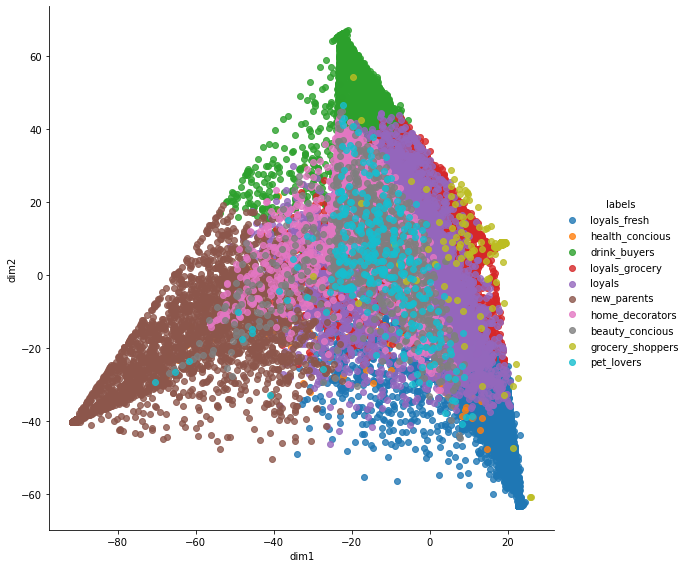

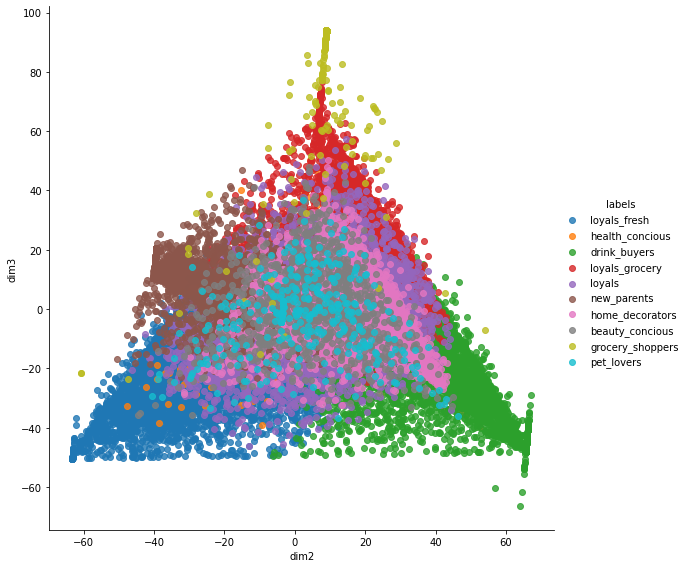

In [71]:
pca_2d_plot_labels(pca, df, frame)

In [68]:
frame.groupby('class')['total_items'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
beauty_concious,1098.0,25.408015,13.749524,6.0,16.0,24.0,31.0,139.0
drink_buyers,3379.0,23.474697,11.721262,6.0,15.0,22.0,30.0,98.0
grocery_shoppers,508.0,46.505906,24.481406,6.0,27.0,46.0,63.0,135.0
health_concious,693.0,25.370851,13.691042,6.0,16.0,23.0,32.0,113.0
home_decorators,2812.0,26.631579,13.927703,6.0,17.0,24.0,33.0,122.0
loyals,5009.0,42.433021,19.574792,7.0,29.0,37.0,51.0,140.0
loyals_fresh,6184.0,38.304010,18.526456,6.0,26.0,34.0,47.0,139.0
loyals_grocery,5537.0,37.994763,18.791817,6.0,26.0,34.0,47.0,134.0
new_parents,2541.0,18.261708,11.165452,6.0,10.0,16.0,23.0,126.0


In [69]:
frame.groupby('class')['discount%'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
beauty_concious,1098.0,11.572933,11.979475,-7.81,2.6825,7.850,16.060,61.86
drink_buyers,3379.0,5.624948,7.965894,-65.15,0.6550,3.500,7.750,66.14
grocery_shoppers,508.0,93.660669,14.194915,42.08,100.0000,100.000,100.000,100.00
health_concious,693.0,5.687778,8.263874,-5.54,0.7600,2.830,7.160,52.49
home_decorators,2812.0,12.682070,10.345358,-23.98,4.4700,11.095,18.585,86.09
loyals,5009.0,6.503452,6.925823,-8.07,1.8400,4.370,8.710,52.45
loyals_fresh,6184.0,5.289843,6.686707,0.00,1.0100,3.060,6.890,65.10
loyals_grocery,5537.0,6.053366,7.241132,-11.99,1.4800,3.780,7.890,51.90
new_parents,2541.0,8.951614,9.980204,-23.89,1.0600,4.770,14.740,53.29


In [72]:
frame['class'].value_counts().sort_values(ascending=False)

loyals_fresh        6184
loyals_grocery      5537
loyals              5009
drink_buyers        3379
home_decorators     2812
new_parents         2541
beauty_concious     1098
health_concious      693
grocery_shoppers     508
pet_lovers           340
Name: class, dtype: int64

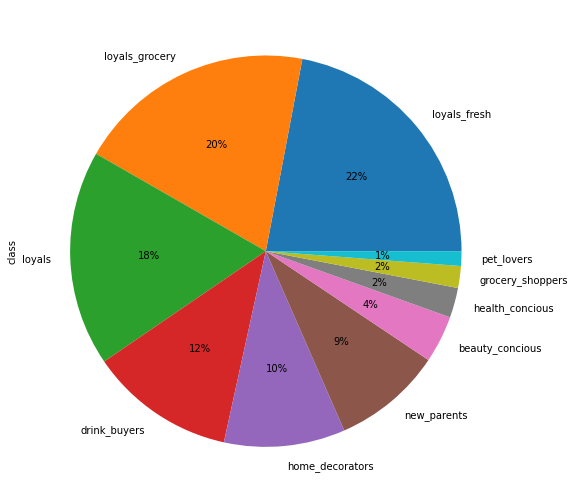

In [73]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

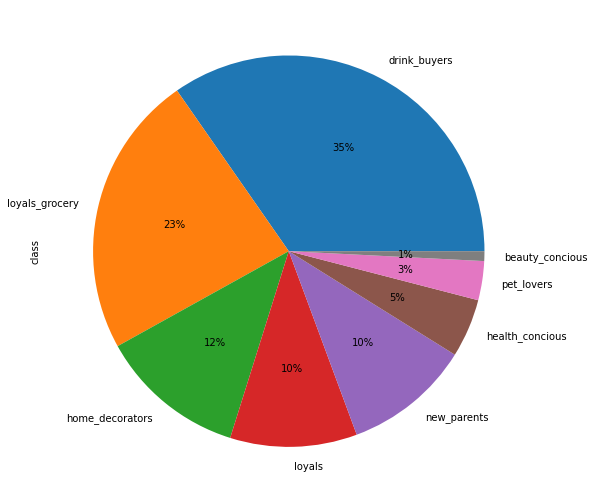

In [74]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [75]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5214.469136,15625.950617,31.320988,-4.152099,3.530864,13.654321,25.182840,0.395185,30.732716,19.597160,3.425926,2.552840,15.455185,2.658272,4.987654
std,3112.784642,9280.915095,20.371443,4.709740,2.115930,6.504153,21.628512,3.556667,14.179246,18.381239,6.621533,8.096041,28.721343,10.098877,2.680923
min,296.000000,1105.000000,6.000000,-23.980000,1.000000,0.000000,0.000000,0.000000,4.470000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2256.000000,6657.000000,16.000000,-5.770000,2.000000,10.000000,3.840000,0.000000,17.600000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5289.000000,15827.000000,26.000000,-2.520000,3.000000,14.000000,24.250000,0.000000,29.540000,17.420000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,8011.000000,24272.000000,40.000000,-0.910000,5.000000,19.000000,37.460000,0.000000,40.890000,31.080000,3.980000,0.000000,17.920000,0.000000,7.000000
max,10113.000000,29734.000000,86.000000,-0.030000,7.000000,23.000000,78.570000,32.010000,63.690000,74.670000,37.820000,52.570000,86.330000,67.420000,9.000000


In [76]:
frame[frame['discount%']<0].shape[0]

124